# Assignment 1 : Gym Members Exercise Data

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [64]:
#Read datset
data = pd.read_csv('gym_members_exercise_tracking.csv')
data

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                        1.69           1313.0         Yoga            12.6   
1                        1.30            883.0         HIIT            33.9   
2                        1.11            677.0       Cardio            33.4   
3                        0.59            532.0     Strength            28.8   
4                        0.64            556.0     Strength            29.2   
..                        ...              ...          ...             ...   
968                      1.57           1364.0     Strength            10.0   
969                      1.38           1260.0     Strength            25.0   
970                      1.72            929.0       Cardio            18.8   
971                      1.10            883.0         HIIT            28.2   
972                      0.75            542.0     Strength            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [66]:
#display null values
data.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [67]:
data = data.drop(['Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Water_Intake (liters)'], axis=1)

In [68]:
data.head()

Age  Gender  Weight (kg)  Height (m)  Session_Duration (hours)  \
0   56    Male         88.3        1.71                      1.69   
1   46  Female         74.9        1.53                      1.30   
2   32  Female         68.1        1.66                      1.11   
3   25    Male         53.2        1.70                      0.59   
4   38    Male         46.1        1.79                      0.64   

   Calories_Burned Workout_Type  Fat_Percentage  \
0           1313.0         Yoga            12.6   
1            883.0         HIIT            33.9   
2            677.0       Cardio            33.4   
3            532.0     Strength            28.8   
4            556.0     Strength            29.2   

   Workout_Frequency (days/week)  Experience_Level    BMI  
0                              4                 3  30.20  
1                              4                 2  32.00  
2                              4                 2  24.71  
3                              3                 1  18.41  
4                              3                 1  14.39

## Categorical Variables

In [69]:
#display workout type unique values
data.Workout_Type.unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [70]:
#channging data metric
data['Weight'] = data['Weight (kg)'] * 2.20462
data['Height'] = data['Height (m)'] * 39.3701
data = data.drop(['Weight (kg)', 'Height (m)'], axis=1)

In [71]:
#display workout type counts
sum_type = data.Workout_Type.value_counts()
sum_type

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

bar chart for workout type

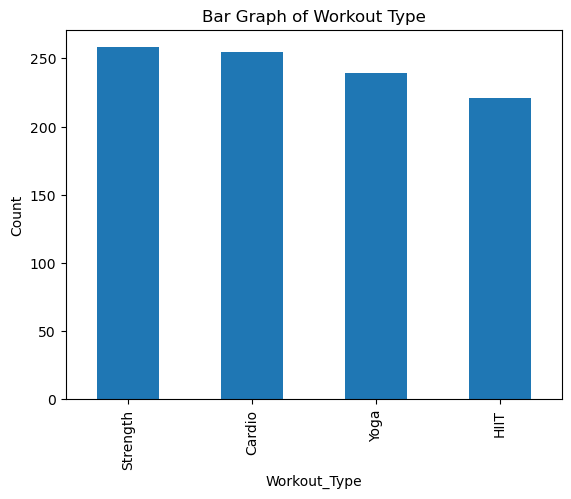

In [72]:
plt.figure()
ax = sum_type.plot(kind='bar')
ax.set_title("Bar Graph of Workout Type")
ax.set_ylabel("Count")
plt.show()

In [73]:
#display gender counts
sum_gender = data.Gender.value_counts()
sum_gender

Gender
Male      511
Female    462
Name: count, dtype: int64

bar chart for gender

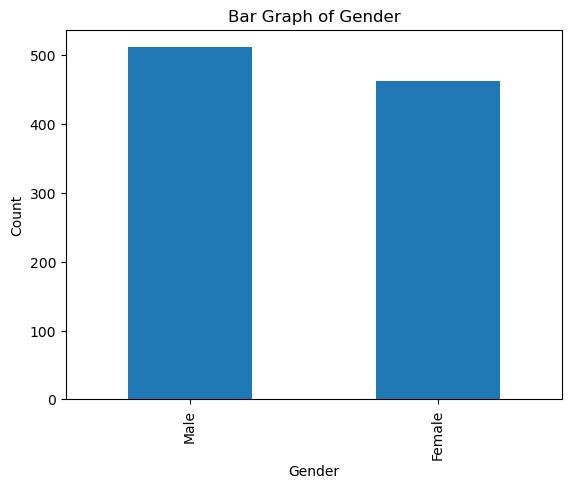

In [74]:
plt.figure()
ax = sum_gender.plot(kind='bar')
ax.set_title("Bar Graph of Gender")
ax.set_ylabel("Count")
plt.show()

In [75]:
#display exxperience level counts
sum_exlevel = data.Experience_Level.value_counts()
sum_exlevel

Experience_Level
2    406
1    376
3    191
Name: count, dtype: int64

bar chart of experience level

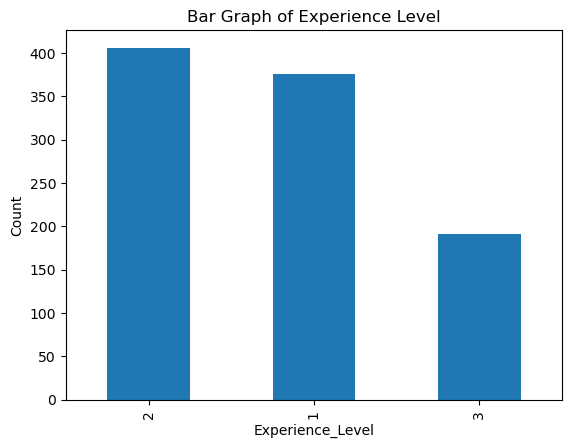

In [76]:
plt.figure()
ax = sum_exlevel.plot(kind='bar')
ax.set_title("Bar Graph of Experience Level")
ax.set_ylabel("Count")
plt.show()

In [77]:
#table of gender and experience level
workout_type_gender = data[["Gender","Experience_Level"]]
counts = pd.crosstab(data["Gender"],data["Experience_Level"])
counts

Experience_Level    1    2    3
Gender                         
Female            179  193   90
Male              197  213  101

<Figure size 640x480 with 0 Axes>

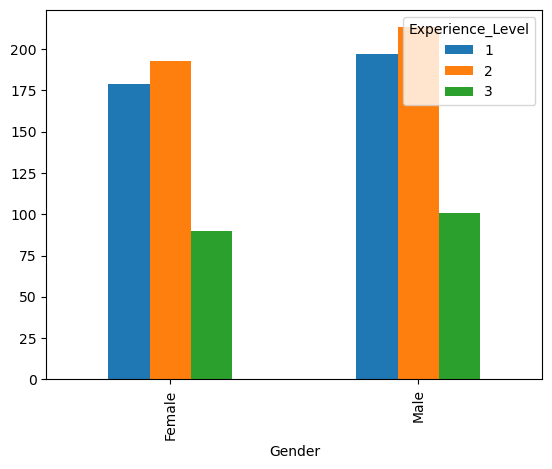

In [78]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

In [79]:
#table of gender and workout type
workout_type_gender = data[["Gender","Workout_Type"]]
counts = pd.crosstab(data["Gender"],data["Workout_Type"])
counts

Workout_Type  Cardio  HIIT  Strength  Yoga
Gender                                    
Female           126   107       123   106
Male             129   114       135   133

<Figure size 640x480 with 0 Axes>

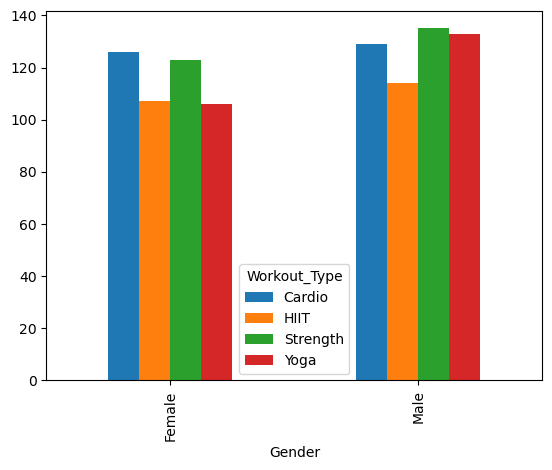

In [80]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

In [81]:
#table of experience level and workout type
workout_type_gender = data[["Experience_Level","Workout_Type"]]
counts = pd.crosstab(data["Experience_Level"],data["Workout_Type"])
counts

Workout_Type      Cardio  HIIT  Strength  Yoga
Experience_Level                              
1                    109    85        97    85
2                    102    87       116   101
3                     44    49        45    53

<Figure size 640x480 with 0 Axes>

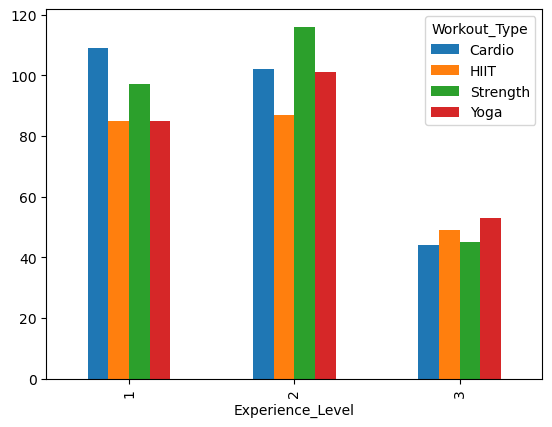

In [82]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

In [83]:
#display freq counts
sum_freq = data['Workout_Frequency (days/week)'].value_counts()
sum_freq

Workout_Frequency (days/week)
3    368
4    306
2    197
5    102
Name: count, dtype: int64

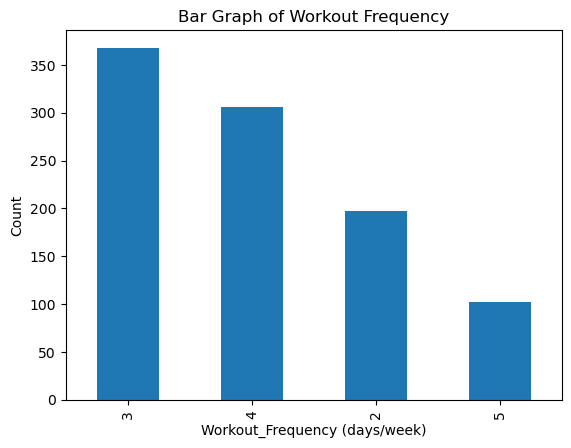

In [84]:
plt.figure()
ax = sum_freq.plot(kind='bar')
ax.set_title("Bar Graph of Workout Frequency")
ax.set_ylabel("Count")
plt.show()

In [85]:
workout_type_gender = data[["Gender","Workout_Frequency (days/week)"]]
counts = pd.crosstab(data["Gender"],data["Workout_Frequency (days/week)"])
counts

Workout_Frequency (days/week)    2    3    4   5
Gender                                          
Female                          87  178  150  47
Male                           110  190  156  55

<Figure size 640x480 with 0 Axes>

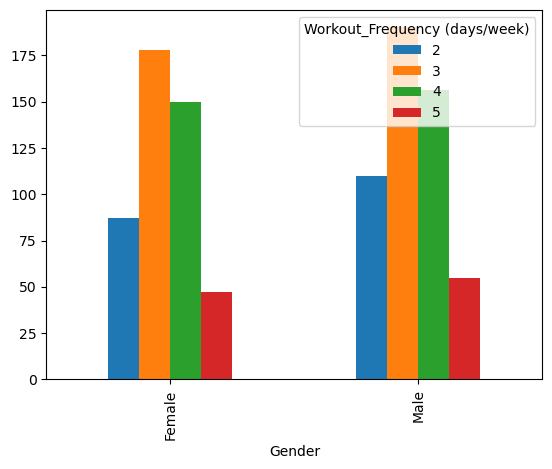

In [86]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

In [87]:
workout_type_gender = data[["Workout_Frequency (days/week)","Workout_Type"]]
counts = pd.crosstab(data["Workout_Frequency (days/week)"],data["Workout_Type"])
counts

Workout_Type                   Cardio  HIIT  Strength  Yoga
Workout_Frequency (days/week)                              
2                                  63    42        45    47
3                                  92    86       102    88
4                                  77    67        85    77
5                                  23    26        26    27

<Figure size 640x480 with 0 Axes>

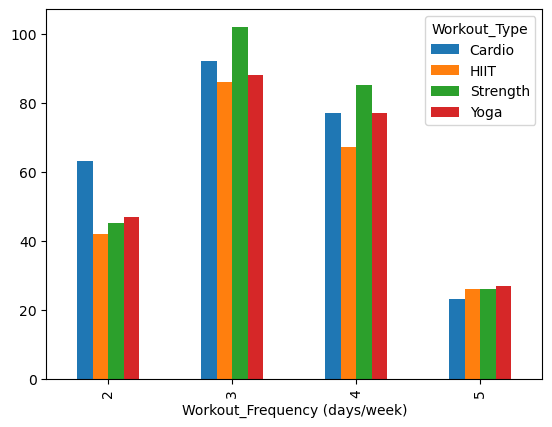

In [88]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

In [89]:
workout_type_gender = data[["Experience_Level","Workout_Frequency (days/week)"]]
counts = pd.crosstab(data["Experience_Level"],data["Workout_Frequency (days/week)"])
counts

Workout_Frequency (days/week)    2    3    4    5
Experience_Level                                 
1                              197  179    0    0
2                                0  189  217    0
3                                0    0   89  102

<Figure size 640x480 with 0 Axes>

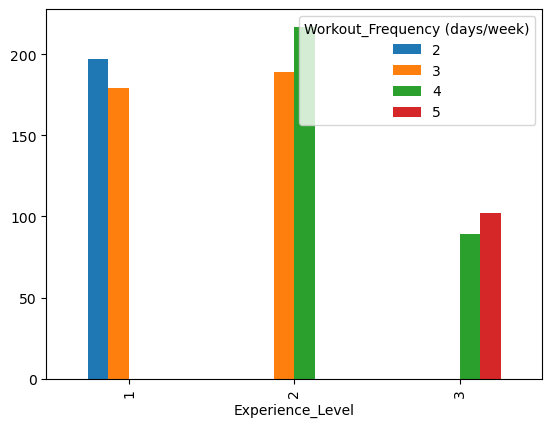

In [90]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

Text(0.5, 1.0, 'Histogram of Age')

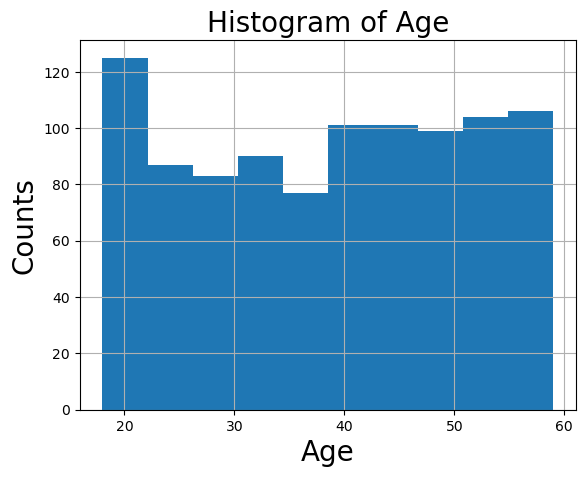

In [91]:
ax = data.Age.hist()
ax.set_xlabel("Age",fontsize=20)
ax.set_ylabel("Counts",fontsize=20)
ax.set_title("Histogram of Age",fontsize=20)

## Numerical Variables

In [92]:
print(data.columns)

Index(['Age', 'Gender', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Weight', 'Height'],
      dtype='object')


In [93]:
data_num = data.drop(['Gender', 'Workout_Type', 'Experience_Level', 'Workout_Frequency (days/week)'], axis=1)

In [94]:
data_num.head()

Age  Session_Duration (hours)  Calories_Burned  Fat_Percentage    BMI  \
0   56                      1.69           1313.0            12.6  30.20   
1   46                      1.30            883.0            33.9  32.00   
2   32                      1.11            677.0            33.4  24.71   
3   25                      0.59            532.0            28.8  18.41   
4   38                      0.64            556.0            29.2  14.39   

       Weight     Height  
0  194.667946  67.322871  
1  165.126038  60.236253  
2  150.134622  65.354366  
3  117.285784  66.929170  
4  101.632982  70.472479

Text(0.5, 1.0, 'Scatterplot of Weight by Height')

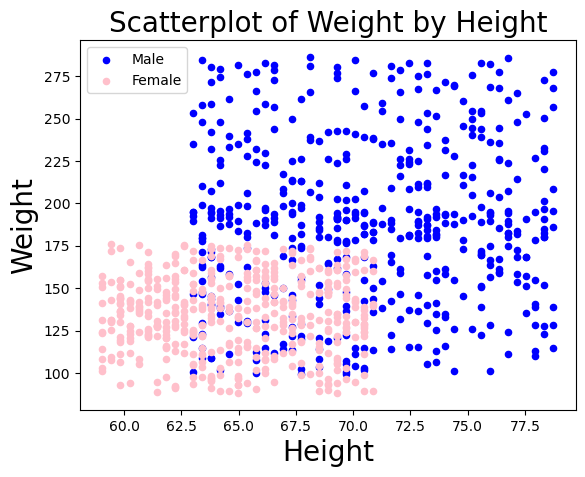

In [95]:
#Create a Scatterplot
ax = data[data['Gender'] == 'Male'].plot.scatter('Height', 'Weight', color='blue', label='Male', ax=None)
data[data['Gender'] == 'Female'].plot.scatter('Height', 'Weight', color='pink', label='Female', ax=ax)
ax.set_xlabel("Height",fontsize=20)
ax.set_ylabel("Weight",fontsize=20)
ax.set_title("Scatterplot of Weight by Height",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Height by Weight')

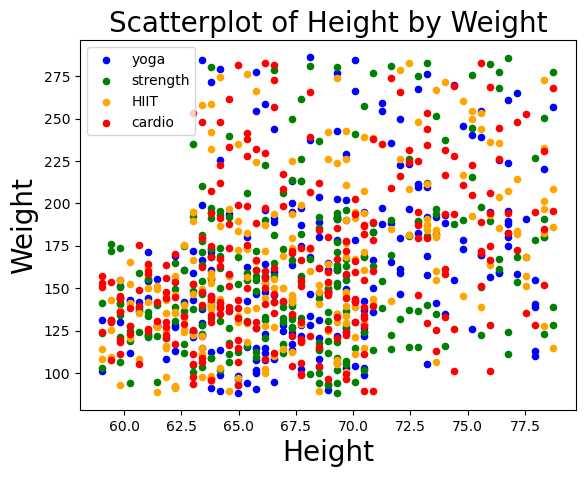

In [96]:
ax = data[data['Workout_Type'] == 'Yoga'].plot.scatter('Height', 'Weight', color='blue', label='yoga', ax=None)
data[data['Workout_Type'] == 'Strength'].plot.scatter('Height', 'Weight', color='green', label='strength', ax=ax)
data[data['Workout_Type'] == 'HIIT'].plot.scatter('Height', 'Weight', color='orange', label='HIIT', ax=ax)
data[data['Workout_Type'] == 'Cardio'].plot.scatter('Height', 'Weight', color='red', label='cardio', ax=ax)
ax.set_xlabel("Height",fontsize=20)
ax.set_ylabel("Weight",fontsize=20)
ax.set_title("Scatterplot of Height by Weight",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Duration by Calories Burned')

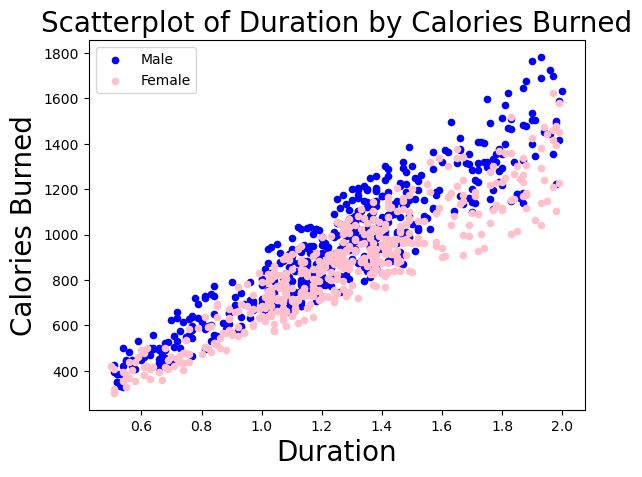

In [97]:
ax = data[data['Gender'] == 'Male'].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='blue', label='Male', ax=None)
data[data['Gender'] == 'Female'].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='pink', label='Female', ax=ax)
ax.set_xlabel("Duration",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of Duration by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Duration by Calories Burned')

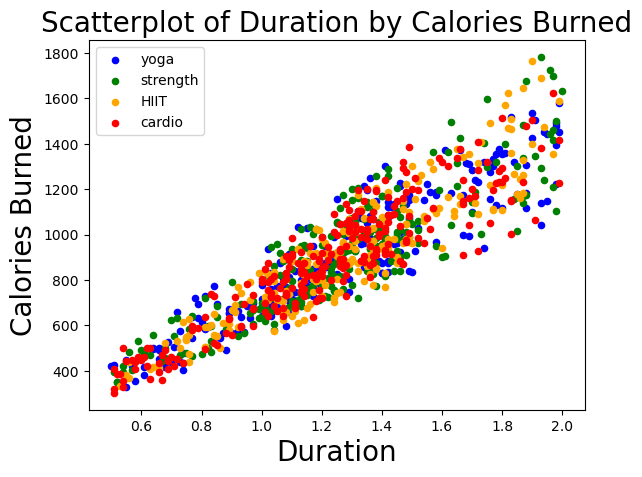

In [98]:
ax = data[data['Workout_Type'] == 'Yoga'].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='blue', label='yoga', ax=None)
data[data['Workout_Type'] == 'Strength'].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='green', label='strength', ax=ax)
data[data['Workout_Type'] == 'HIIT'].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='orange', label='HIIT', ax=ax)
data[data['Workout_Type'] == 'Cardio'].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='red', label='cardio', ax=ax)
ax.set_xlabel("Duration",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of Duration by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Duration by Calories Burned')

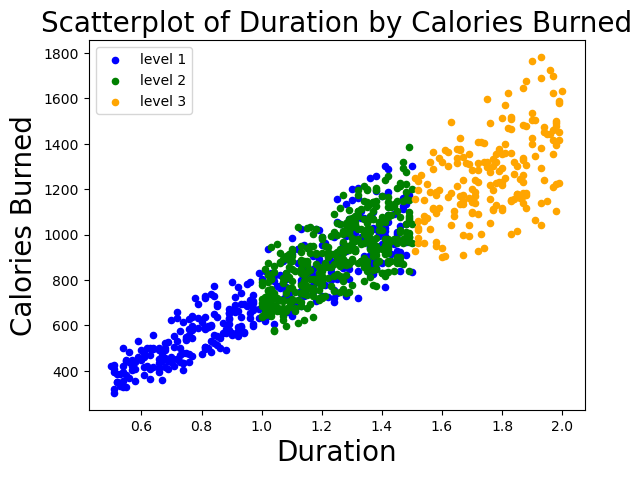

In [99]:
ax = data[data['Experience_Level'] == 1].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='blue', label='level 1', ax=None)
data[data['Experience_Level'] == 2].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='green', label='level 2', ax=ax)
data[data['Experience_Level'] == 3].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='orange', label='level 3', ax=ax)
ax.set_xlabel("Duration",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of Duration by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Fat Percenatage by Calories Burned')

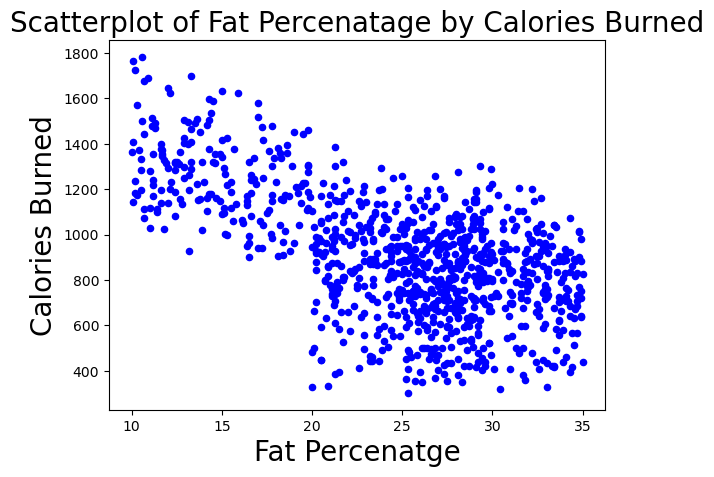

In [100]:
ax = data_num.plot.scatter('Fat_Percentage', 'Calories_Burned', color='blue', ax=None)
ax.set_xlabel("Fat Percenatge",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of Fat Percenatage by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Duration by Calories Burned')

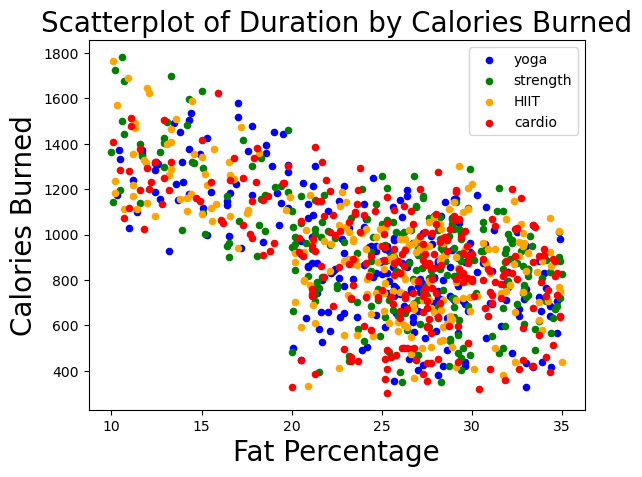

In [101]:
ax = data[data['Workout_Type'] == 'Yoga'].plot.scatter('Fat_Percentage', 'Calories_Burned', color='blue', label='yoga', ax=None)
data[data['Workout_Type'] == 'Strength'].plot.scatter('Fat_Percentage', 'Calories_Burned', color='green', label='strength', ax=ax)
data[data['Workout_Type'] == 'HIIT'].plot.scatter('Fat_Percentage', 'Calories_Burned', color='orange', label='HIIT', ax=ax)
data[data['Workout_Type'] == 'Cardio'].plot.scatter('Fat_Percentage', 'Calories_Burned', color='red', label='cardio', ax=ax)
ax.set_xlabel("Fat Percentage",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of Duration by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Duration by Calories Burned')

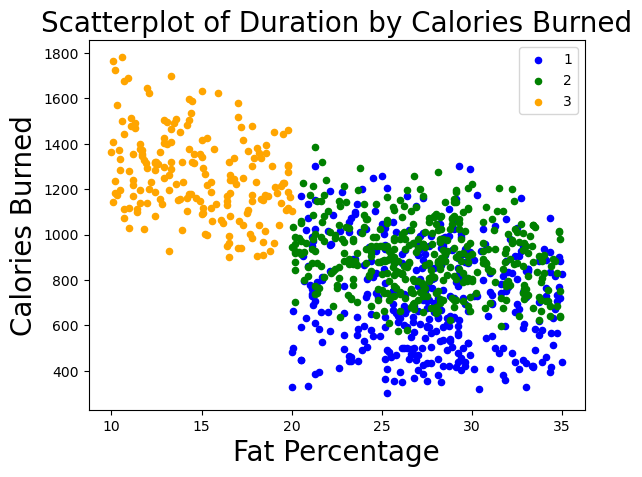

In [102]:
ax = data[data['Experience_Level'] == 1].plot.scatter('Fat_Percentage', 'Calories_Burned', color='blue', label='1', ax=None)
data[data['Experience_Level'] == 2].plot.scatter('Fat_Percentage', 'Calories_Burned', color='green', label='2', ax=ax)
data[data['Experience_Level'] == 3].plot.scatter('Fat_Percentage', 'Calories_Burned', color='orange', label='3', ax=ax)
ax.set_xlabel("Fat Percentage",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of Duration by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of BMI by Calories Burned')

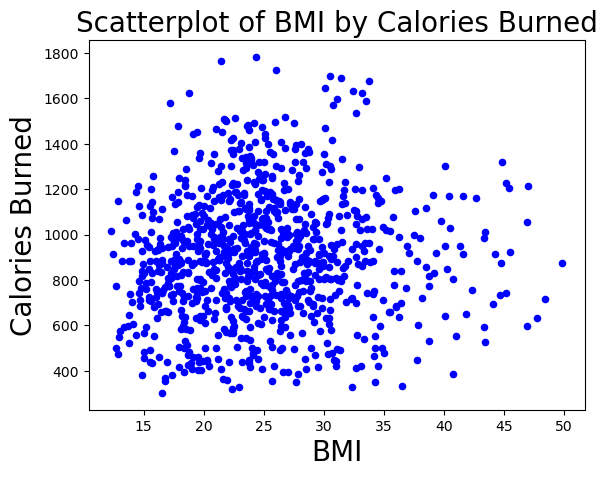

In [103]:
ax = data_num.plot.scatter('BMI', 'Calories_Burned', color='blue', ax=None)
ax.set_xlabel("BMI",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of BMI by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Fat Percnetage by Duration')

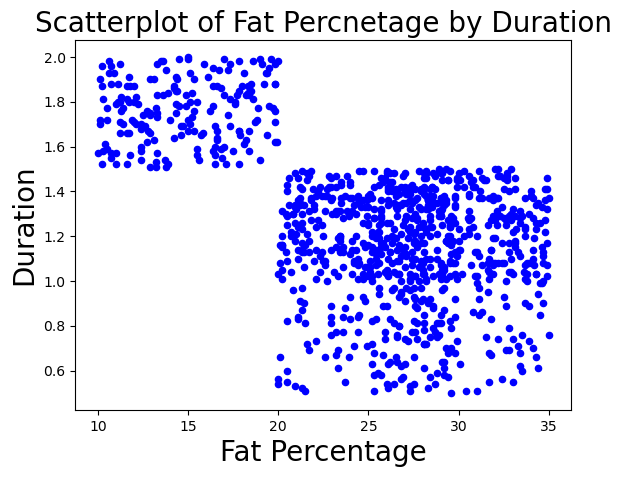

In [104]:
ax = data_num.plot.scatter('Fat_Percentage', 'Session_Duration (hours)', color='blue', ax=None)
ax.set_xlabel("Fat Percentage",fontsize=20)
ax.set_ylabel("Duration",fontsize=20)
ax.set_title("Scatterplot of Fat Percnetage by Duration",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Fat Percnetage by BMI')

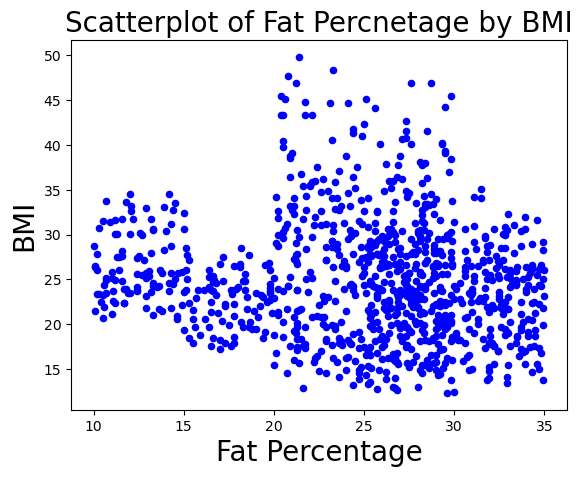

In [105]:
ax = data_num.plot.scatter('Fat_Percentage', 'BMI', color='blue', ax=None)
ax.set_xlabel("Fat Percentage",fontsize=20)
ax.set_ylabel("BMI",fontsize=20)
ax.set_title("Scatterplot of Fat Percnetage by BMI",fontsize=20)

In [106]:
categorical_features = ['Gender']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
data

Age  Session_Duration (hours)  Calories_Burned Workout_Type  \
0     56                      1.69           1313.0         Yoga   
1     46                      1.30            883.0         HIIT   
2     32                      1.11            677.0       Cardio   
3     25                      0.59            532.0     Strength   
4     38                      0.64            556.0     Strength   
..   ...                       ...              ...          ...   
968   24                      1.57           1364.0     Strength   
969   25                      1.38           1260.0     Strength   
970   59                      1.72            929.0       Cardio   
971   32                      1.10            883.0         HIIT   
972   46                      0.75            542.0     Strength   

     Fat_Percentage  Workout_Frequency (days/week)  Experience_Level    BMI  \
0              12.6                              4                 3  30.20   
1              33.9                              4                 2  32.00   
2              33.4                              4                 2  24.71   
3              28.8                              3                 1  18.41   
4              29.2                              3                 1  14.39   
..              ...                            ...               ...    ...   
968            10.0                              4                 3  28.77   
969            25.0                              2                 1  25.69   
970            18.8                              5                 3  19.50   
971            28.2                              3                 2  37.74   
972            28.8                              2                 1  33.38   

         Weight     Height  Gender_Male  
0    194.667946  67.322871         True  
1    165.126038  60.236253        False  
2    150.134622  65.354366        False  
3    117.285784  66.929170         True  
4    101.632982  70.472479         True  
..          ...        ...          ...  
968  192.022402  68.503974         True  
969  146.827692  63.385861         True  
970  133.159048  69.291376        False  
971  278.663968  72.047283         True  
972  195.549794  64.173263         True  

[973 rows x 11 columns]

In [107]:
X = data.drop(["Workout_Type"], axis=1)
X

Age  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0     56                      1.69           1313.0            12.6   
1     46                      1.30            883.0            33.9   
2     32                      1.11            677.0            33.4   
3     25                      0.59            532.0            28.8   
4     38                      0.64            556.0            29.2   
..   ...                       ...              ...             ...   
968   24                      1.57           1364.0            10.0   
969   25                      1.38           1260.0            25.0   
970   59                      1.72            929.0            18.8   
971   32                      1.10            883.0            28.2   
972   46                      0.75            542.0            28.8   

     Workout_Frequency (days/week)  Experience_Level    BMI      Weight  \
0                                4                 3  30.20  194.667946   
1                                4                 2  32.00  165.126038   
2                                4                 2  24.71  150.134622   
3                                3                 1  18.41  117.285784   
4                                3                 1  14.39  101.632982   
..                             ...               ...    ...         ...   
968                              4                 3  28.77  192.022402   
969                              2                 1  25.69  146.827692   
970                              5                 3  19.50  133.159048   
971                              3                 2  37.74  278.663968   
972                              2                 1  33.38  195.549794   

        Height  Gender_Male  
0    67.322871         True  
1    60.236253        False  
2    65.354366        False  
3    66.929170         True  
4    70.472479         True  
..         ...          ...  
968  68.503974         True  
969  63.385861         True  
970  69.291376        False  
971  72.047283         True  
972  64.173263         True  

[973 rows x 10 columns]

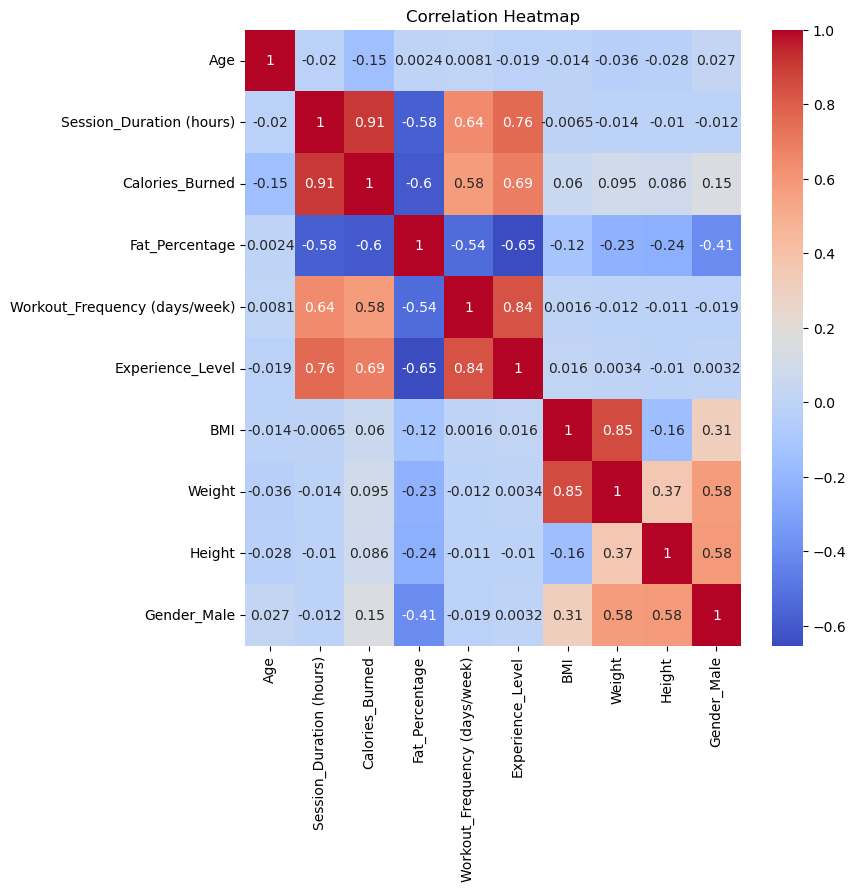

In [108]:
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Session_Duration (hours)', 'Calories_Burned', 
                      'Fat_Percentage','BMI', 'Weight', 'Height']
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data

Age  Session_Duration (hours)  Calories_Burned Workout_Type  \
0    1.422343                  1.264598         1.495690         Yoga   
1    0.600965                  0.127098        -0.082284         HIIT   
2   -0.548964                 -0.427068        -0.838243       Cardio   
3   -1.123928                 -1.943735        -1.370351     Strength   
4   -0.056137                 -1.797902        -1.282278     Strength   
..        ...                       ...              ...          ...   
968 -1.206066                  0.914598         1.682845     Strength   
969 -1.123928                  0.360432         1.301196     Strength   
970  1.668756                  1.352098         0.086523       Cardio   
971 -0.548964                 -0.456235        -0.082284         HIIT   
972  0.600965                 -1.477068        -1.333653     Strength   

     Fat_Percentage  Workout_Frequency (days/week)  Experience_Level  \
0         -1.978321                              4                 3   
1          1.426301                              4                 2   
2          1.346380                              4                 2   
3          0.611110                              3                 1   
4          0.675047                              3                 1   
..              ...                            ...               ...   
968       -2.393908                              4                 3   
969        0.003713                              2                 1   
970       -0.987304                              5                 3   
971        0.515205                              3                 2   
972        0.611110                              2                 1   

          BMI    Weight    Height  Gender_Male  
0    0.794278  0.681493 -0.098545         True  
1    1.064652  0.049316 -1.508604        False  
2   -0.030361 -0.271491 -0.490228        False  
3   -0.976669 -0.974433 -0.176881         True  
4   -1.580503 -1.309393  0.528148         True  
..        ...       ...       ...          ...  
968  0.579482  0.624880  0.136465         True  
969  0.116842 -0.342257 -0.881911         True  
970 -0.812942 -0.634756  0.293138        False  
971  1.926843  2.478951  0.841495         True  
972  1.271938  0.700363 -0.725238         True  

[973 rows x 11 columns]

In [110]:
data.columns

Index(['Age', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type',
       'Fat_Percentage', 'Workout_Frequency (days/week)', 'Experience_Level',
       'BMI', 'Weight', 'Height', 'Gender_Male'],
      dtype='object')

## Classification of Workout Type

In [111]:
X = data.drop(['Session_Duration (hours)', 'Calories_Burned', 'Workout_Type',
       'Fat_Percentage', 'Workout_Frequency (days/week)', 'Weight', 'Height'], axis=1)
X

Age  Experience_Level       BMI  Gender_Male
0    1.422343                 3  0.794278         True
1    0.600965                 2  1.064652        False
2   -0.548964                 2 -0.030361        False
3   -1.123928                 1 -0.976669         True
4   -0.056137                 1 -1.580503         True
..        ...               ...       ...          ...
968 -1.206066                 3  0.579482         True
969 -1.123928                 1  0.116842         True
970  1.668756                 3 -0.812942        False
971 -0.548964                 2  1.926843         True
972  0.600965                 1  1.271938         True

[973 rows x 4 columns]

In [112]:
y = data["Workout_Type"]
y

0          Yoga
1          HIIT
2        Cardio
3      Strength
4      Strength
         ...   
968    Strength
969    Strength
970      Cardio
971        HIIT
972    Strength
Name: Workout_Type, Length: 973, dtype: object

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [115]:
y_pred = clf.predict(X_test)
y_pred

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.28205128205128205


              precision    recall  f1-score   support

      Cardio       0.25      0.43      0.32        46
        HIIT       0.28      0.33      0.30        42
    Strength       0.32      0.30      0.31        47
        Yoga       0.33      0.12      0.17        60

    accuracy                           0.28       195
   macro avg       0.30      0.30      0.28       195
weighted avg       0.30      0.28      0.27       195

[[20 14  9  3]
 [17 14  7  4]
 [15 11 14  7]
 [28 11 14  7]]


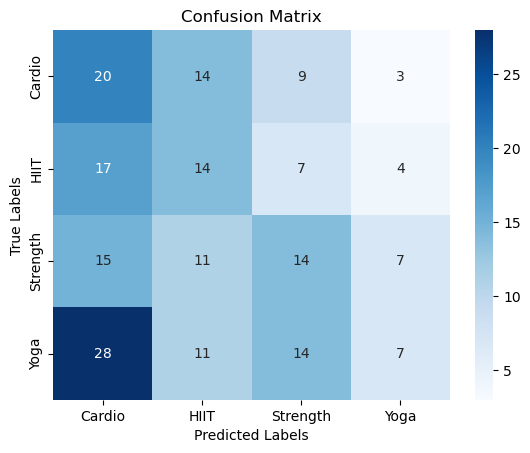

In [116]:
from sklearn.metrics import classification_report, confusion_matrix


print(classification_report(y_test, y_pred))
print((confusion_matrix(y_test, y_pred)))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [117]:
#decision tree
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [118]:
y_pred = dtc.predict(X_test)
y_pred

acc = accuracy_score(y_test, y_pred)
acc

0.24615384615384617

              precision    recall  f1-score   support

      Cardio       0.21      0.24      0.22        46
        HIIT       0.24      0.33      0.28        42
    Strength       0.29      0.26      0.27        47
        Yoga       0.26      0.18      0.22        60

    accuracy                           0.25       195
   macro avg       0.25      0.25      0.25       195
weighted avg       0.25      0.25      0.24       195

[[11 15  9 11]
 [11 14  6 11]
 [12 14 12  9]
 [19 15 15 11]]


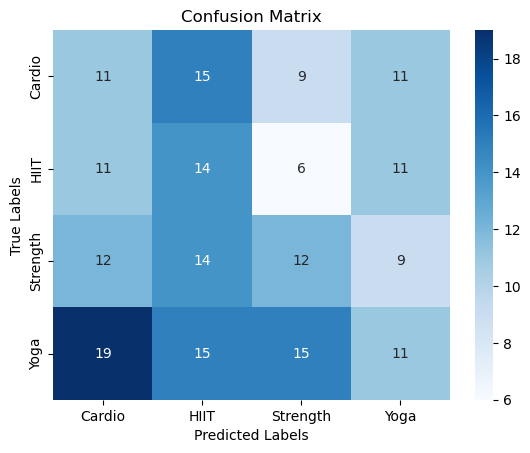

In [119]:
print(classification_report(y_test, y_pred))
print((confusion_matrix(y_test, y_pred)))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [120]:
#log regression
cls = LogisticRegression()
cls.fit(X_train, y_train)

LogisticRegression()

In [121]:
y_pred = cls.predict(X_test)
acc = accuracy_score(y_pred, y_test)
acc

0.28205128205128205

              precision    recall  f1-score   support

      Cardio       0.32      0.63      0.42        46
        HIIT       0.20      0.02      0.04        42
    Strength       0.23      0.38      0.29        47
        Yoga       0.35      0.12      0.17        60

    accuracy                           0.28       195
   macro avg       0.27      0.29      0.23       195
weighted avg       0.28      0.28      0.23       195

[[29  2 12  3]
 [17  1 19  5]
 [23  1 18  5]
 [22  1 30  7]]


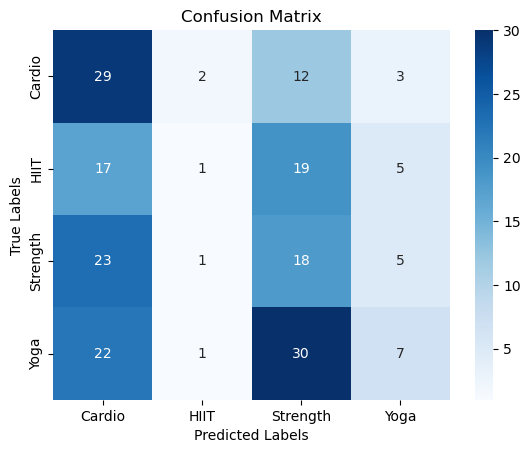

In [122]:
print(classification_report(y_test, y_pred))
print((confusion_matrix(y_test, y_pred)))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()